# Import&Define

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import pprint
import sys

In [ ]:
l=["R","P","S"]
def sf1():
  def search(n,dna):
    x=[0,0,0]
    for i in range(1,len(dna)+1):
      c=dna[:-i].count(dna[-i:]+n)
      if c==0:
        if x:
          return x
        else:
          return 0
      else:
        if i==1:
          x[0]=c
        else:
          x[1]+=c
          x[2]==c
  s=[search(str(i),h) for i in range(9)]
  a=s[0]+s[3]+s[7] #P
  b=s[1]+s[5]+s[8] #R
  c=s[2]+s[4]+s[6] #S
  return [a,b,c]

def sf2():
  def search(n,dna):
    x=[0,0,0]
    for i in range(1,len(dna)+1):
      c=dna[:-i].count(dna[-i:]+n)
      if c==0:
        if x:
          return x
        else:
          return 0
      else:
        if i==1:
          x[0]=c
        else:
          x[1]+=c
          x[2]==c
  s=[search(str(i),h) for i in range(9)]
  rs=[search(i,rl) for i in ["R","P","S"]]
  ls=[search(i,ll) for i in ["R","P","S"]]
  a=s[0]+s[3]+s[7]+rs[1]+ls[1] #P
  b=s[1]+s[5]+s[8]+rs[0]+ls[0] #R
  c=s[2]+s[4]+s[6]+rs[2]+ls[2] #S
  return [a,b,c]

In [ ]:
model=keras.Sequential()
model.add(layers.Dense(9,input_shape=(27,),activation="tanh"))
model.add(layers.LeakyReLU())
model.add(layers.Dense(3,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 252       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nmodel=keras.Sequential()
nmodel.add(layers.Dense(9,input_shape=(27,),activation="tanh"))
nmodel.add(layers.LeakyReLU())
nmodel.set_weights(mw[:2])
nmodel.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 9)                 252       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 9)                 0         
                                                                 
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lmodel=keras.Sequential()
lmodel.add(layers.LSTM(9,input_shape=(None,9),return_sequences=False))
lmodel.add(layers.Dense(3,activation="softmax"))
lmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 9)                 684       
                                                                 
 dense_10 (Dense)            (None, 3)                 30        
                                                                 
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmodel=keras.Sequential()
rmodel.add(layers.Dense(15,input_shape=(45,)))
rmodel.add(layers.Dense(6,activation="tanh"))
rmodel.add(layers.LeakyReLU())
rmodel.add(layers.Dense(3,activation="softmax"))
rmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                690       
                                                                 
 dense_4 (Dense)             (None, 6)                 96        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer=keras.optimizers.Adam(0.001)
loss_fn=keras.losses.SparseCategoricalCrossentropy()
loss_vs=keras.losses.SparseCategoricalCrossentropy()
train_metric=keras.metrics.SparseTopKCategoricalAccuracy(k=1)
two_metric=keras.metrics.SparseTopKCategoricalAccuracy(k=2)
confidence_metric=keras.metrics.SparseTopKCategoricalAccuracy(k=1)

In [ ]:
def train_vs(model,x,y):
  global count
  with tf.GradientTape() as tape:
    logits=model(x,training=True)
    loss_value=loss_vs(y,logits)

  train_metric.update_state([y],[logits])
  two_metric.update_state([y],[logits])
  if tf.reduce_max(logits)>0.35:
    count+=1
    confidence_metric.update_state([y],[logits])
  grads=tape.gradient(loss_value,model.trainable_weights)
  optimizer.apply_gradients(zip(grads,model.trainable_weights))
  return logits,loss_value


"""@tf.function
def train_data(x,y):
  with tf.GradientTape() as tape:
    logits=model(x,training=True,)
    loss_value=loss_fn(y,logits)

  grads=tape.gradient(loss_value,model.trainable_weights)
  optimizer.apply_gradients(zip(grads,model.trainable_weights))
  return logits,loss_value"""

# Other Bots Code

In [ ]:
dlluc="""import random

numPre = 30
numMeta = 6
if not input:
    limit = 8
    beat = {'R': 'P', 'P': 'S', 'S': 'R'}
    moves = ['', '', '', '']
    pScore = [[5] * numPre, [5] * numPre, [5] * numPre, [5] * numPre, [5] * numPre, [5] * numPre]
    centrifuge = {'RP': 0, 'PS': 1, 'SR': 2, 'PR': 3, 'SP': 4, 'RS': 5, 'RR': 6, 'PP': 7, 'SS': 8}
    centripete = {'R': 0, 'P': 1, 'S': 2}
    soma = [0, 0, 0, 0, 0, 0, 0, 0, 0];
    rps = [1, 1, 1];
    a = "RPS"
    best = [0, 0, 0];
    length = 0
    p = [random.choice("RPS")] * numPre
    m = [random.choice("RPS")] * numMeta
    mScore = [5, 2, 5, 2, 4, 2]
else:
    for i in range(numPre):
        pp = p[i]
        bpp = beat[pp]
        bbpp = beat[bpp]
        pScore[0][i] = 0.9 * pScore[0][i] + ((input == pp) - (input == bbpp)) * 3
        pScore[1][i] = 0.9 * pScore[1][i] + ((output == pp) - (output == bbpp)) * 3
        pScore[2][i] = 0.87 * pScore[2][i] + (input == pp) * 3.3 - (input == bpp) * 1.2 - (input == bbpp) * 2.3
        pScore[3][i] = 0.87 * pScore[3][i] + (output == pp) * 3.3 - (output == bpp) * 1.2 - (output == bbpp) * 2.3
        pScore[4][i] = (pScore[4][i] + (input == pp) * 3) * (1 - (input == bbpp))
        pScore[5][i] = (pScore[5][i] + (output == pp) * 3) * (1 - (output == bbpp))
    for i in range(numMeta):
        mScore[i] = 0.96 * (mScore[i] + (input == m[i]) - (input == beat[beat[m[i]]]))
    soma[centrifuge[input + output]] += 1;
    rps[centripete[input]] += 1;
    moves[0] += str(centrifuge[input + output])
    moves[1] += input
    moves[2] += output
    length += 1
    for y in range(3):
        j = min([length, limit])
        while j >= 1 and not moves[y][length - j:length] in moves[y][0:length - 1]:
            j -= 1
        i = moves[y].rfind(moves[y][length - j:length], 0, length - 1)
        p[0 + 2 * y] = moves[1][j + i]
        p[1 + 2 * y] = beat[moves[2][j + i]]
    j = min([length, limit])
    while j >= 2 and not moves[0][length - j:length - 1] in moves[0][0:length - 2]:
        j -= 1
    i = moves[0].rfind(moves[0][length - j:length - 1], 0, length - 2)
    if j + i >= length:
        p[6] = p[7] = random.choice("RPS")
    else:
        p[6] = moves[1][j + i]
        p[7] = beat[moves[2][j + i]]

    best[0] = soma[centrifuge[output + 'R']] * rps[0] / rps[centripete[output]]
    best[1] = soma[centrifuge[output + 'P']] * rps[1] / rps[centripete[output]]
    best[2] = soma[centrifuge[output + 'S']] * rps[2] / rps[centripete[output]]
    p[8] = p[9] = a[best.index(max(best))]

    for i in range(10, numPre):
        p[i] = beat[beat[p[i - 10]]]

    for i in range(0, numMeta, 2):
        m[i] = p[pScore[i].index(max(pScore[i]))]
        m[i + 1] = beat[p[pScore[i + 1].index(max(pScore[i + 1]))]]
output = beat[m[mScore.index(max(mScore))]]
if max(mScore) < 0.07 or random.randint(3, 40) > length:
    output = beat[random.choice("RPS")]"""

ioc="""
#Iocaine powder based AI

import random

# 2 different lengths of history, 3 kinds of history, both, mine, yours
# 3 different limit length of reverse learning
# 6 kinds of strategy based on Iocaine Powder
num_predictor = 27

if input=="":
    len_rfind = [20]
    limit = [10,20,60]
    beat = { "R":"P" , "P":"S", "S":"R"}
    not_lose = { "R":"PPR" , "P":"SSP" , "S":"RRS" } #50-50 chance
    my_his   =""
    your_his =""
    both_his =""
    list_predictor = [""]*num_predictor
    length = 0
    temp1 = { "PP":"1" , "PR":"2" , "PS":"3",
              "RP":"4" , "RR":"5", "RS":"6",
              "SP":"7" , "SR":"8", "SS":"9"}
    temp2 = { "1":"PP","2":"PR","3":"PS",
                "4":"RP","5":"RR","6":"RS",
                "7":"SP","8":"SR","9":"SS"} 
    who_win = { "PP": 0, "PR":1 , "PS":-1,
                "RP": -1,"RR":0, "RS":1,
                "SP": 1, "SR":-1, "SS":0}
    score_predictor = [0]*num_predictor
    output = random.choice("RPS")
    predictors = [output]*num_predictor
else:
    #update predictors
    #
    if len(list_predictor[0])<5:
        front =0
    else:
        front =1
    for i in range (num_predictor):
        if predictors[i]==input:
            result ="1"
        else:
            result ="0"
        list_predictor[i] = list_predictor[i][front:5]+result #only 5 rounds before
    #history matching 1-6
    my_his += output
    your_his += input
    both_his += temp1[input+output]
    length +=1
    for i in range(1):
        len_size = min(length,len_rfind[i])
        j=len_size
        #both_his
        while j>=1 and not both_his[length-j:length] in both_his[0:length-1]:
            j-=1
        if j>=1:
            k = both_his.rfind(both_his[length-j:length],0,length-1)
            predictors[0+6*i] = your_his[j+k]
            predictors[1+6*i] = beat[my_his[j+k]]
        else:
            predictors[0+6*i] = random.choice("RPS")
            predictors[1+6*i] = random.choice("RPS")
        j=len_size
        #your_his
        while j>=1 and not your_his[length-j:length] in your_his[0:length-1]:
            j-=1
        if j>=1:
            k = your_his.rfind(your_his[length-j:length],0,length-1)
            predictors[2+6*i] = your_his[j+k]
            predictors[3+6*i] = beat[my_his[j+k]]
        else:
            predictors[2+6*i] = random.choice("RPS")
            predictors[3+6*i] = random.choice("RPS")
        j=len_size
        #my_his
        while j>=1 and not my_his[length-j:length] in my_his[0:length-1]:
            j-=1
        if j>=1:
            k = my_his.rfind(my_his[length-j:length],0,length-1)
            predictors[4+6*i] = your_his[j+k]
            predictors[5+6*i] = beat[my_his[j+k]]
        else:
            predictors[4+6*i] = random.choice("RPS")
            predictors[5+6*i] = random.choice("RPS")

    for i in range(3):
        temp =""
        search = temp1[(output+input)] #last round
        for start in range(2, min(limit[i],length) ):
            if search == both_his[length-start]:
                temp+=both_his[length-start+1]
        if(temp==""):
            predictors[6+i] = random.choice("RPS")
        else:
            collectR = {"P":0,"R":0,"S":0} #take win/lose from opponent into account
            for sdf in temp:
                next_move = temp2[sdf]
                if(who_win[next_move]==-1):
                    collectR[temp2[sdf][1]]+=3
                elif(who_win[next_move]==0):
                    collectR[temp2[sdf][1]]+=1
                elif(who_win[next_move]==1):
                    collectR[beat[temp2[sdf][0]]]+=1
            max1 = -1
            p1 =""
            for key in collectR:
                if(collectR[key]>max1):
                    max1 = collectR[key]
                    p1 += key
            predictors[6+i] = random.choice(p1)
    
    #rotate 9-27:
    for i in range(9,27):
        predictors[i] = beat[beat[predictors[i-9]]]
        
    #choose a predictor
    len_his = len(list_predictor[0])
    for i in range(num_predictor):
        sum = 0
        for j in range(len_his):
            if list_predictor[i][j]=="1":
                sum+=(j+1)*(j+1)
            else:
                sum-=(j+1)*(j+1)
        score_predictor[i] = sum
    max_score = max(score_predictor)
    #min_score = min(score_predictor)
    #c_temp = {"R":0,"P":0,"S":0}
    #for i in range (num_predictor):
        #if score_predictor[i]==max_score:
        #    c_temp[predictors[i]] +=1
        #if score_predictor[i]==min_score:
        #    c_temp[predictors[i]] -=1
    if max_score>0:
        predict = predictors[score_predictor.index(max_score)]
    else:
        predict = random.choice(your_his)
    output = random.choice(not_lose[predict])
"""

# Other Bots

In [ ]:
class rfind:
    def __init__(self):
        self.dna=""
        self.combine = { 'PP': '0', 
                      'PR': '1', 
                      'PS': '2',
                      'RP': '3',
                      'RS': '4',
                      'RR': '5',
                      'SS': '6',
                      'SP': '7',
                      'SR': '8',}
        self.split = {   '0':'PP', 
                      '1':'PR', 
                      '2':'PS',
                      '3':'RP',
                      '4':'RS',
                      '5':'RR',
                      '6':'SS',
                      '7':'SP',
                      '8':'SR',}
        self.anti = {'P': 'S', 'R': 'P', 'S': 'R'}
        self.output = random.choice(['R', 'P', 'S'])
    def main(self,input):
        self.dna
        if self.output != "":
            self.dna += self.combine[self.output + input]

        for length in range(min(20, len(self.dna)-1), 0, -1):
            search =self.dna[-length:]
            idx =self.dna.rfind(search, 0, -1)
            if idx != -1:
                answered =self.dna[idx + length]
                expected = self.split[answered][1]
                self.output = self.anti[expected]
                return self.output
            else:
                self.output = random.choice(['R', 'P', 'S'])
        return self.output
    


In [ ]:
class Bot:
    """Basic bot class to wrap bot functions"""
    def __init__(self, name, code=None):
        """
name should be a unique identifier and must be a readable
filename if code is not specified
"""
        self.name = name
        if code is None:
            self.load_code()
        else:
            self.code = code

        self.reset()

    def __eq__(self, other):
        return self.name == other.name

    def get_move(self, input_):
        """Get the next move for the bot given input
input must be "R", "P", "S" or ""
"""
        if self._code is None:
            self.compile_code()

        self.scope["input"] = input_
        exec(self._code, self.scope)
        self.output = self.scope["output"]
        return self.output

    def compile_code(self):
        self._code = compile(self.code, '<string>', 'exec')

    def reset(self):
        """Resets bot for another round.  This must be called before trying
to pass the bot between workers, or you may see obscure errors from failures
to pickle the bots scope dictionary."""
        self.scope = dict()

        # this will hold compiled code, but it apparently can't be
        # pickled? so we'll have to do it later.  XXX check into this
        self._code = None

    def load_code(self):
        self.code = self.name

dllu=Bot(dlluc)
io2=Bot(ioc)

# Main

In [ ]:
simple=True
match=10
rl=""
ll=""
hisl=[[] for _ in range(match)]
whisl=[[] for _ in range(match)]
mem=[[] for _ in range(match)]
losses=[]
for i in range(match):
  r=rfind()
  dllu.reset()
  io2.reset()
  score=0
  rout=io2.get_move("")
  lout=random.choice("RPS")
  whis=[[]]
  two_metric.reset_states()
  train_metric.reset_states()
  confidence_metric.reset_states()
  loss=[]
  mem=[]
  for j in range(1000):
    score+=1 if (l.index(lout)+3-l.index(rout))%3==1 else -1 if (l.index(lout)+3-l.index(rout))%3==2 else 0
    
    rl+=rout
    ll+=lout

    nrout=r.main(lout)
    output1 = io2.get_move(lout)
    nrout=nrout if simple else output1
    
    h=r.dna
    
    sr1=sf1()
    sr2=sf2()

    w=(l.index(nrout)+1)%3
    whisl[i].append(w)
   
    
    """logits,loss_value=train_vs(np.array(sr1).reshape(1,27),w)
    lout=l[np.argmax(logits)]
    loss.append(loss_value)"""

    if simple:
      logits,loss_value=train_vs(model,np.array(sr1).reshape(1,27),w)
      #logits,loss_value=train_vs(rmodel,np.array(sr2).reshape(1,45),w)
      lout=l[np.argmax(logits)]
      loss.append(loss_value)
    else:
      #base=rmodel(np.array(sr2).reshape(1,45),w)
      base=nmodel(np.array(sr1).reshape(1,27))
      mem.append(base)
      """base=model(np.array(sr2).reshape(1,27),w)
      b=[0,0,0]
      b[l.index(rout)]=1
      last=[0,0,0]
      last[l.index(lout)]=1
      m=[0,0,0]
      m[np.argmax(base)]=1
      inp=b+last+m
      hisl[i].append(inp)
      if j>50:
        logits,loss_value=train_vs(lmodel,np.array(hisl[i][-50:]).reshape(1,50,9),w)"""
      #if j>50:
      logits,loss_value=train_vs(lmodel,np.array(mem[-50:]).reshape(1,min(j+1,50),9),w)
      lout=l[np.argmax(logits)]
      loss.append(loss_value)
      #else:
      #  lout=l[np.argmax(base)]
      #  if j==50:
      #    print(score)
    
    if (j+1)%1000==0:
      print(nrout,lout)
      print(i,j+1,score,np.average(loss),float(train_metric.result())*100,float(two_metric.result()-train_metric.result())*100,float(confidence_metric.result())*100)
      #score=0
      losses.append(loss)
    rout=nrout

In [ ]:
rmodel.save("rmodel.h5")
rmodel.save_weights("rweights.h5")

In [ ]:
mw=model.get_weights()
mw

In [ ]:
simple=True
match=10
rl=""
ll=""
hisl=[[] for _ in range(match)]
whisl=[[] for _ in range(match)]
mem=[[] for _ in range(match)]
losses=[]
for i in range(match):
  r=rfind()
  dllu.reset()
  io2.reset()
  score=0
  rout=io2.get_move("")
  lout=random.choice("RPS")
  whis=[[]]
  two_metric.reset_states()
  train_metric.reset_states()
  confidence_metric.reset_states()
  loss=[]
  mem=[]
  for j in range(1000):
    score+=1 if (l.index(lout)+3-l.index(rout))%3==1 else -1 if (l.index(lout)+3-l.index(rout))%3==2 else 0
    
    rl+=rout
    ll+=lout

    nrout=r.main(lout)
    output1 = io2.get_move(lout)
    nrout=nrout if simple else output1
    
    h=r.dna
    
    sr1=sf1()
    sr2=sf2()

    w=(l.index(nrout)+1)%3
    whisl[i].append(w)
   
    
    """logits,loss_value=train_vs(np.array(sr1).reshape(1,27),w)
    lout=l[np.argmax(logits)]
    loss.append(loss_value)"""

    if simple:
      logits,loss_value=train_vs(model,np.array(sr1).reshape(1,27),w)
      #logits,loss_value=train_vs(rmodel,np.array(sr2).reshape(1,45),w)
      lout=l[np.argmax(logits)]
      loss.append(loss_value)
    else:
      #base=rmodel(np.array(sr2).reshape(1,45),w)
      base=nmodel(np.array(sr1).reshape(1,27))
      mem.append(base)
      """base=model(np.array(sr2).reshape(1,27),w)
      b=[0,0,0]
      b[l.index(rout)]=1
      last=[0,0,0]
      last[l.index(lout)]=1
      m=[0,0,0]
      m[np.argmax(base)]=1
      inp=b+last+m
      hisl[i].append(inp)
      if j>50:
        logits,loss_value=train_vs(lmodel,np.array(hisl[i][-50:]).reshape(1,50,9),w)"""
      #if j>50:
      logits,loss_value=train_vs(lmodel,np.array(mem[-50:]).reshape(1,min(j+1,50),9),w)
      lout=l[np.argmax(logits)]
      loss.append(loss_value)
      #else:
      #  lout=l[np.argmax(base)]
      #  if j==50:
      #    print(score)
    
    if (j+1)%1000==0:
      print(nrout,lout)
      print(i,j+1,score,np.average(loss),float(train_metric.result())*100,float(two_metric.result()-train_metric.result())*100,float(confidence_metric.result())*100)
      #score=0
      losses.append(loss)
    rout=nrout

# 新增區段

In [ ]:
#base vs rfind
match=20
lossl=[]
for i in range(match):
  r=rfind()
  rout=r.output
  score=0
  lout=random.choice("RPS")
  
  count=0
  loss=0
  two_metric.reset_states()
  train_metric.reset_states()
  confidence_metric.reset_states()
  for rc in range(20):
    with tf.GradientTape() as tape:
      for j in range(50):
        score+=1 if (l.index(lout)+3-l.index(rout))%3==1 else -1 if (l.index(lout)+3-l.index(rout))%3==2 else 0
        nrout=r.main(lout)

        h=r.dna
        sr1=sf1()
        w=(l.index(nrout)+1)%3

        logits=model(np.array(sr1).reshape(1,27),training=True)
        loss_value=loss_vs(w,logits)
        lout=l[np.argmax(logits)]
        loss=tf.add(loss_value/50,loss)
        rout=nrout

        train_metric.update_state([w],[logits])
        two_metric.update_state([w],[logits])
        if tf.reduce_max(logits)>0.35:
          count+=1
          confidence_metric.update_state([w],[logits])
    
    grads=tape.gradient(loss,model.trainable_weights)
    optimizer.apply_gradients(zip(grads,model.trainable_weights))
  lossl.append(loss.numpy()/20)
  print(i,(rc)*50+j+1,score,loss.numpy()/20,float(train_metric.result())*100,float(two_metric.result()-train_metric.result())*100,count,float(confidence_metric.result())*100)

0 1000 423 0.9100632667541504 63.499999046325684 24.59999918937683 989 64.00404572486877
1 1000 402 0.9277278900146484 61.19999885559082 25.0 985 61.82740926742554
2 1000 404 0.8916275978088379 62.90000081062317 25.40000081062317 981 63.404691219329834
3 1000 407 0.8880913734436036 62.90000081062317 25.0 989 63.29625844955444
4 1000 417 0.8983946800231933 62.699997425079346 27.300000190734863 984 63.51625919342041
5 1000 420 0.910454273223877 62.699997425079346 25.300002098083496 979 63.534218072891235
6 1000 405 0.9065862655639648 62.00000047683716 25.099998712539673 979 62.921351194381714
7 1000 435 0.8938164710998535 64.3999993801117 24.09999966621399 979 65.066397190094
8 1000 448 0.8758986473083497 65.2999997138977 24.699997901916504 979 65.7814085483551
9 1000 471 0.8706388473510742 65.89999794960022 24.900001287460327 982 66.49694442749023
10 1000 460 0.861094856262207 65.49999713897705 22.700005769729614 988 65.48582911491394
11 1000 493 0.8302860260009766 66.50000214576721 25.

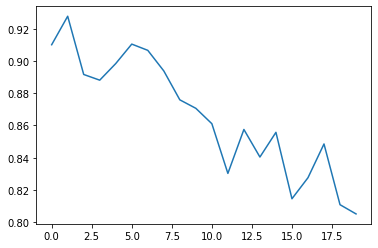

In [ ]:
plt.plot(lossl)

In [ ]:
model.save("modelsave")

INFO:tensorflow:Assets written to: modelsave/assets
